In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
data.shape

(200, 5)

In [ ]:
data.isnull().sum()

In [7]:
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

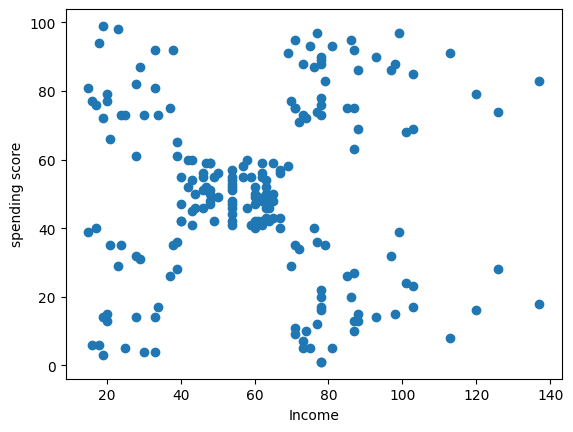

In [4]:
plt.scatter(x[...,0], x[...,1])
plt.xlabel('Income')
plt.ylabel('spending score')
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def ward_distance(cluster1, cluster2):
    n1, n2 = len(cluster1), len(cluster2)
    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)
    return (n1 * n2) / (n1 + n2) * np.sum((centroid1 - centroid2) ** 2)

def ward_agglomerative(X, n_clusters=5):
    clusters = [[x] for x in X]

    while len(clusters) > n_clusters:
        min_dist = float('inf')
        pair_to_merge = (0, 1)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = ward_distance(clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    pair_to_merge = (i, j)

        i, j = pair_to_merge
        new_cluster = clusters[i] + clusters[j]
        clusters.pop(j)
        clusters.pop(i)
        clusters.append(new_cluster)

    labels = np.zeros(len(X), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where((X == point).all(axis=1))[0][0]
            labels[idx] = cluster_idx

    return labels, clusters

labels, clusters = ward_agglomerative(x, n_clusters=5)
print(labels )



[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 4 3 4 0 2 3 4 3 4 3 4 3 4 3 2 3 4 3 2 3
 4 3 4 3 4 3 4 3 4 3 0 3 2 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


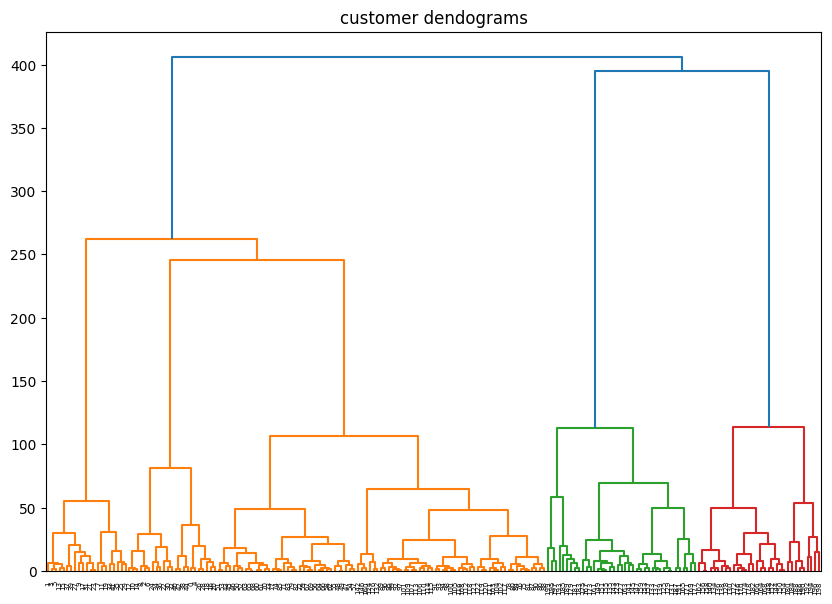

In [13]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("customer dendograms")
dend=shc.dendrogram(shc.linkage(x , method ='ward'))